 
**Связь реккурентных и нереккурентных платежей доноров благотворительный фонд помощи детям-отказникам и детям-сиротам “Бюро добрых дел"**


**Источник данных** - csv файл payments, предоставленный фондом с информацие о платежах

**Содержимое таблицы payments:**

- client_id- id клиента
- pay_datetime- дата платежа
- pay_hour - час платежа (у части платежей час указан 0)
- pay_sum- сумма платежа
- recurrentis- был ли платёж по подписке
- pay_method- по какому каналу поступили деньги
- pay_purpose_cat- категория платежа (на основании основания платежа)
- first_pay- первый платёж данного клиента
- lt- количество дней, прошедшее с первого платежа данного клиента до даты данного платежа

**Цель:** опровергнуть или подтвердить гипотезы, выдвинутые с целью нахождения связи между платежами по подписке и разовыми донатами

**Гипотезы:**
- **Гипотеза 1** - среди доноров подавляющее большинство осуществляют платежи или только по подписке, или только разово. Филантропы, совершающие платежи и по подписке и разово - редкость
- **Гипотеза 2** - аномально высокие значения платежей (как по подписки, так и разовых) для рассматриваемых доноров позволяют найти переспективных и более вовлеченных в продукт филантропов
- **Гипотеза 3** - среди доноров, осуществляющих платежи как по подписке, так и разово, суммы рекурентных и нерукерентных платежей взаимосвязаны - чем больше рекуретный платеж, тем меньше разовый
- **Гипотеза 4** - частота единоразовых платежей от доноров,  осуществляющих платежи как по подписке, так и разово - невелика
- **Гипотеза 5** - доноры сначала совершают единоразовые платежи, а затем переходят на подписку

# Предобработка данных

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np 
sns.set(context='notebook', style='whitegrid', 
        palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc={'figure.figsize':(10,5)})

In [80]:
clients = pd.read_csv('df_clients.csv')

In [81]:
payments = pd.read_csv('df_payments.csv')

In [82]:
payments.head()

,client_id,pay_datetime,pay_date,pay_sum,recurrentis,pay_method,pay_purpose_cat,pay_hour,first_pay,lt
0,81662625-B780-41E6-ACEE-F8F5162E79A2,2015-07-19 20:25:16,2015-07-19,101.0,1,cards,general,20,2015-07-19,0
1,81662625-B780-41E6-ACEE-F8F5162E79A2,2015-07-19 20:10:11,2015-07-19,100.0,0,cards,general,20,2015-07-19,0
2,BDAA50F8-8C5B-4D26-880C-54AE83C2FE01,2015-07-20 01:24:54,2015-07-20,102.0,0,cards,general,1,2015-07-20,0
3,BDAA50F8-8C5B-4D26-880C-54AE83C2FE01,2015-07-20 00:09:10,2015-07-20,98.0,0,cards,general,0,2015-07-20,0
4,BDAA50F8-8C5B-4D26-880C-54AE83C2FE01,2015-07-20 01:14:34,2015-07-20,6.0,0,cards,general,1,2015-07-20,0


In [83]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14025 entries, 0 to 14024
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   client_id        14025 non-null  object 
 1   pay_datetime     14025 non-null  object 
 2   pay_date         14025 non-null  object 
 3   pay_sum          14025 non-null  float64
 4   recurrentis      14025 non-null  int64  
 5   pay_method       14025 non-null  object 
 6   pay_purpose_cat  14025 non-null  object 
 7   pay_hour         14025 non-null  int64  
 8   first_pay        14025 non-null  object 
 9   lt               14025 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 1.1+ MB


In [84]:
### КОД РЕВЬЮЕРА
payments.loc[payments.duplicated(keep=False)]

,client_id,pay_datetime,pay_date,pay_sum,recurrentis,pay_method,pay_purpose_cat,pay_hour,first_pay,lt
5882,4A6AE7BD-C006-485A-B605-AD6C922EF574,2020-02-28 00:00:00,2020-02-28,500.0,0,account,telic,0,2019-06-10,263
5889,4A6AE7BD-C006-485A-B605-AD6C922EF574,2020-02-28 00:00:00,2020-02-28,500.0,0,account,telic,0,2019-06-10,263
8650,C6CA05F1-C324-46EE-8A5A-7B1302DBB149,2020-12-27 00:00:00,2020-12-27,100.0,0,account,general,0,2020-12-27,0
8659,C6CA05F1-C324-46EE-8A5A-7B1302DBB149,2020-12-27 00:00:00,2020-12-27,100.0,0,account,general,0,2020-12-27,0
9100,D38F6A22-9BEF-4484-B377-ED8ED1DB4553,2021-02-11 00:00:00,2021-02-11,1.0,0,account,general,0,2021-02-11,0
9101,D38F6A22-9BEF-4484-B377-ED8ED1DB4553,2021-02-11 00:00:00,2021-02-11,1.0,0,account,general,0,2021-02-11,0
9696,8FBCD1D4-5490-496F-A089-FB39AB7975AF,2021-04-12 00:00:00,2021-04-12,10.0,0,account,general,0,2021-03-01,42
9699,8FBCD1D4-5490-496F-A089-FB39AB7975AF,2021-04-12 00:00:00,2021-04-12,10.0,0,account,general,0,2021-03-01,42
11236,FFCCBA23-89CA-4A22-BD8A-7CAD2D9EB7F7,2021-09-13 00:00:00,2021-09-13,20.0,0,account,general,0,2021-08-29,15
11237,FFCCBA23-89CA-4A22-BD8A-7CAD2D9EB7F7,2021-09-13 00:00:00,2021-09-13,20.0,0,account,general,0,2021-08-29,15


In [85]:
payments.duplicated().sum()

13

Удалим дубликаты

In [86]:
payments = payments.drop_duplicates()

In [87]:
payments = payments.rename(columns = {'client_id':'ID'})

In [88]:
payments.pay_sum.describe()

count    1.401200e+04
mean     1.700856e+03
std      2.950926e+04
min     -1.365000e+04
25%      1.500000e+02
50%      3.450000e+02
75%      6.000000e+02
max      3.000000e+06
Name: pay_sum, dtype: float64

Удалим отрицательные значения платежа - возвраты

In [89]:
payments = payments.query('pay_sum >0')

Coздадим дополнительный признак - год осуществления платежа, в дальнейшем будем смотреть данные в том числе и в разрезе лет

In [90]:
payments['year'] = (pd.to_datetime(payments['pay_datetime'], format = '%Y-%m-%d %H:%M:%S')).dt.year

In [91]:
payments['pay_datetime'] = pd.to_datetime(payments['pay_datetime'], format = '%Y-%m-%d %H:%M:%S')

# Исследовательский анализ данных

## Гипотеза 1 - количество доноров, совершающих платежи и разово и по подписке невелико

In [92]:
len(payments.groupby('ID', as_index = False)['recurrentis'].nunique().reset_index().query('recurrentis ==2'))

137

У нас всего 137 доноров, осуществлявших платежи и по подписки и разово. Посмотрим их распределение по годам - при этом считаем, что донор совершает рекуррентные и нерекурретные платежи, если за рассматриваемый год он произвел хотя бы один разовый платеж и хотя бы один платеж по подписке

In [93]:
percent_donors = {}
donors_by_year = {}
for year in payments.year.unique():
    print(f'Год: {year}')
    print('Процент доноров с подпиской и разовыми платежами ',
          round(payments.query('year == @year').groupby('ID')['recurrentis']
                .nunique()
                .reset_index()
                .recurrentis.value_counts(normalize = True)*100, 1)
                .reset_index().iloc[1, 1])
    print('Количество доноров с подпиской и разовыми платежами ',
          payments.query('year == @year').groupby('ID')['recurrentis']
                .nunique()
                .reset_index()
                .recurrentis.value_counts()
                .reset_index().iloc[1, 1])
    print('_'*60)
    percent_donors[year] = (round(payments.query('year == @year')
                          .groupby('ID')['recurrentis']
                          .nunique()
                          .reset_index()
                          .recurrentis.value_counts(normalize = True)*100, 1)
                          .reset_index().iloc[1, 1])
    donors_by_year[year] = payments.query('year == @year').groupby('ID')['recurrentis'].nunique().reset_index().query('recurrentis == 2')['ID'].to_list()

Год: 2015
Процент доноров с подпиской и разовыми платежами  2.2
Количество доноров с подпиской и разовыми платежами  2
____________________________________________________________
Год: 2016
Процент доноров с подпиской и разовыми платежами  0.6
Количество доноров с подпиской и разовыми платежами  1
____________________________________________________________
Год: 2017
Процент доноров с подпиской и разовыми платежами  1.7
Количество доноров с подпиской и разовыми платежами  8
____________________________________________________________
Год: 2018
Процент доноров с подпиской и разовыми платежами  3.5
Количество доноров с подпиской и разовыми платежами  7
____________________________________________________________
Год: 2019
Процент доноров с подпиской и разовыми платежами  0.9
Количество доноров с подпиской и разовыми платежами  14
____________________________________________________________
Год: 2020
Процент доноров с подпиской и разовыми платежами  3.9
Количество доноров с подпиской и ра

In [95]:
donors_by_year 

{2015: ['81662625-B780-41E6-ACEE-F8F5162E79A2',
  '8C612BDF-EA62-46C3-9A3E-097BF6D4DE89'],
 2016: ['5FBA473D-B49D-48C8-95DB-136B03533341'],
 2017: ['14607726-6FE8-4F8B-9B3F-6257DAE5DDF0',
  '6F01E30B-5049-4977-99AF-C538B35D7728',
  '74860424-C68F-4FD3-84C3-A7439D0208A2',
  '8613B062-49AA-40F6-B84F-D0C2F194C8A4',
  '99A56103-5BDB-4C2B-AF08-0EF1A3D4DC37',
  'C44DD231-2A72-473C-A6F8-07DEFBCF92C3',
  'C84C73FE-8CF5-4D5A-A72E-5EB4ED30D8E2',
  'DD3B939E-0D90-48A0-921D-5880869367DD'],
 2018: ['07923DBB-392D-4448-8117-E769F52AA476',
  '0887D875-22BA-4D77-896F-451159B6CE0A',
  '2AA1C086-BF4C-4A5B-9237-FCB7BAB3B038',
  '4ECB767F-8830-497B-B395-851D4EACD1F8',
  '91478E1B-C882-4F24-A435-FC4930218C4A',
  '99A56103-5BDB-4C2B-AF08-0EF1A3D4DC37',
  '9E65F2D5-A05C-4373-A194-5A3FC525E6AE'],
 2019: ['0887D875-22BA-4D77-896F-451159B6CE0A',
  '22BDC942-B82B-4004-ADFC-7787F780FB60',
  '414613C0-8AEC-455B-A5F4-C9731C9E6E18',
  '4ECB767F-8830-497B-B395-851D4EACD1F8',
  '5C31E830-6778-4C81-89C6-C2C807C79167',


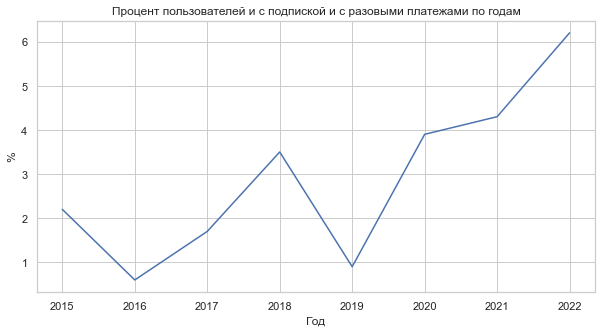

In [96]:
sns.lineplot(data = pd.DataFrame(percent_donors.items()), x = 0, y = 1)
plt.title('Процент пользователей и с подпиской и с разовыми платежами по годам')
plt.xlabel('Год')
plt.ylabel('%');

Рассмотрим количество доноров по годам в разрезе подписка/разовый платеж для оставшихся доноров, то есть доноров осуществляющих платежи только по подписке или только разово

In [97]:
donors_subscription = {}
for item in donors_by_year.items():
    print(f'Год: {item[0]}')
    res = (round(payments.query('year == @item[0] and ID not in @item[1]')
                  .groupby('ID', as_index = False)
                  .recurrentis.first()
                  .recurrentis.value_counts(normalize = True)*100, 1)
                  .reset_index()
                  .rename(columns = {'index':'Subscription', 'recurrentis':'percent of donors'}))
    display(res.set_index('Subscription').merge(payments.query('year == @item[0] and ID not in @item[1]')
                  .groupby('ID', as_index = False)
                  .recurrentis.first()
                  .recurrentis.value_counts() 
                  .reset_index()
                  .rename(columns = {'index':'Subscription', 'recurrentis':'number_of_donnors'}), on = 'Subscription')
                  .set_index('Subscription'))
    donors_subscription[item[0]] = res.iloc[1,1]

Год: 2015


,percent of donors,number_of_donnors
Subscription,,
1,68.9,62
0,31.1,28


Год: 2016


,percent of donors,number_of_donnors
Subscription,,
0,53.3,90
1,46.7,79


Год: 2017


,percent of donors,number_of_donnors
Subscription,,
0,79.4,377
1,20.6,98


Год: 2018


,percent of donors,number_of_donnors
Subscription,,
0,52.3,102
1,47.7,93


Год: 2019


,percent of donors,number_of_donnors
Subscription,,
0,94.6,1464
1,5.4,84


Год: 2020


,percent of donors,number_of_donnors
Subscription,,
0,80.0,794
1,20.0,198


Год: 2021


,percent of donors,number_of_donnors
Subscription,,
0,71.5,556
1,28.5,222


Год: 2022


,percent of donors,number_of_donnors
Subscription,,
0,60.2,271
1,39.8,179


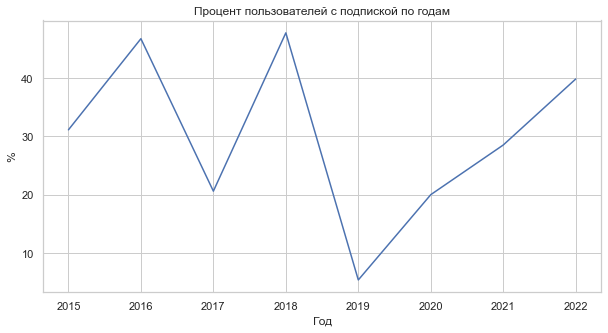

In [98]:
sns.lineplot(data = pd.DataFrame(donors_subscription.items()), x = 0, y = 1)
plt.title('Процент пользователей с подпиской по годам')
plt.xlabel('Год')
plt.ylabel('%');

<div class="alert alert-info" style="background:#ffdbf1;color:#2e00ab">


**Вывод**



Гипотеза 1 подтвердилось - количество доноров и с подпиской и с разовыми платежами невелико - не выше 4,5%. Мы не берем в расчет данные за 2022 год в связи с их неполнотой. Минимальное количество таких пользователей наблюдалось в 2019 и 2016 гг и составляло не более 1 процента.
В целом с 2019 года наблюдается тенденция к росту доли клиентов, осуществляющих платежи и единоразово и по подписке, однако мы не можем сказать что увеличивается их количество - поскольку общее количество филантропов снижается с 2019 года

Помимо всего, мы видим, что количество доноров по подписке растет с 2019 года, однако они до сих пор составляют менее четверти всех платежей (опять таки пока не берем в расчет 2022 год)

Cчитаю что более детальное дробление по времени нерационально - в виду очень небольшого количества доноров. Дальнейшей анализ будет проводится только в разрезе лет
</div>

## Гипотеза 2 - анализ аномально высоких значений платежей с целью выявления перспективных доноров

Посмотрим есть ли выбросы для изучаемых доноров по сумме платежа и проанализиремым эти выбросы как возможных перспективных клиентов

In [100]:
list_perspective_users = []
for item in donors_by_year.items():
    print('Год ', item[0])
    сut_recurrentis_0 = payments.query('year == @item[0] and recurrentis ==0').pay_sum.quantile(0.95)
    сut_recurrentis_1 = payments.query('year == @item[0] and recurrentis ==1').pay_sum.quantile(0.95)
    #payments.query('year == @item[0] and ID in @item[1]')['pay_sum'].hist()
    #plt.show()
    display(payments.query('year == @item[0] and ID in @item[1]')['pay_sum'].describe()[['mean','max']])
    print('Граница выбросов для разовых платежей: ', сut_recurrentis_0)
    print('Граница выбросов для подписки: ', сut_recurrentis_1)
    (list_perspective_users
     .append(payments.query('year == @item[0] and ID in @item[1] and pay_sum >@сut_recurrentis_1 and recurrentis ==1')))
    (list_perspective_users
     .append(payments.query('year == @item[0] and ID in @item[1] and pay_sum >@сut_recurrentis_0 and recurrentis == 0')))
    print('*'*60)

Год  2015


mean     4200.166667
max     10000.000000
Name: pay_sum, dtype: float64

Граница выбросов для разовых платежей:  10000.0
Граница выбросов для подписки:  8815.0
************************************************************
Год  2016


mean     600.0
max     1000.0
Name: pay_sum, dtype: float64

Граница выбросов для разовых платежей:  15000.0
Граница выбросов для подписки:  5000.0
************************************************************
Год  2017


mean     503.333333
max     1000.000000
Name: pay_sum, dtype: float64

Граница выбросов для разовых платежей:  3000.0
Граница выбросов для подписки:  5000.0
************************************************************
Год  2018


mean     1582.978723
max     25000.000000
Name: pay_sum, dtype: float64

Граница выбросов для разовых платежей:  5000.0
Граница выбросов для подписки:  3000.0
************************************************************
Год  2019


mean     16290.991736
max     700000.000000
Name: pay_sum, dtype: float64

Граница выбросов для разовых платежей:  5000.0
Граница выбросов для подписки:  2500.0
************************************************************
Год  2020


mean     425.705747
max     8000.000000
Name: pay_sum, dtype: float64

Граница выбросов для разовых платежей:  5000.0
Граница выбросов для подписки:  2500.0
************************************************************
Год  2021


mean     700.586735
max     8000.000000
Name: pay_sum, dtype: float64

Граница выбросов для разовых платежей:  5000.0
Граница выбросов для подписки:  2500.0
************************************************************
Год  2022


mean      2311.596154
max     250000.000000
Name: pay_sum, dtype: float64

Граница выбросов для разовых платежей:  5000.0
Граница выбросов для подписки:  2500.0
************************************************************


In [101]:
perspective_users = pd.concat(list_perspective_users, axis=0, ignore_index=True)

Оставим только доноров, которые взаимодействовали с продуктом в 2022 году - так мы будем знать, что они все еще вовлечены в продукт

In [102]:
donors_paid_2022 = (payments.sort_values(by = ['ID', 'pay_datetime'])
                    .groupby('ID', as_index = False)['pay_datetime'].last()
                    .query('pay_datetime > "2022-01-01"')['ID'].unique())

In [103]:
perspective_users_id = perspective_users.query('ID in @donors_paid_2022')['ID'].unique()

In [104]:
perspective_users_id

array(['2AA1C086-BF4C-4A5B-9237-FCB7BAB3B038',
       '99A56103-5BDB-4C2B-AF08-0EF1A3D4DC37',
       '2757CAE1-79DF-4D22-8B80-2886279B39AB',
       '6267B856-FE6F-4C2A-A6E4-2713B95A6193',
       'BD5E1551-C7FD-4AB4-904D-EEA917645E3F',
       'CDEF2137-D5F3-434E-BC9F-E219EF43F8C5',
       'AFDD49D8-0156-4B72-8B9E-AE332C41816C',
       'D185B410-AA9A-4870-B39E-9F3F38FF6CB1',
       '1FB01C18-2033-428D-B534-EB01626C08B3',
       '7359E58F-BB53-4354-85DE-EFF6175EDE5B'], dtype=object)

In [105]:
for user in perspective_users_id:
    display(payments.query('ID == @user'))

,ID,pay_datetime,pay_date,pay_sum,recurrentis,pay_method,pay_purpose_cat,pay_hour,first_pay,lt,year
891,2AA1C086-BF4C-4A5B-9237-FCB7BAB3B038,2016-11-19 21:18:03,2016-11-19,3000.0,0,cards,general,21,2016-11-19,0,2016
3027,2AA1C086-BF4C-4A5B-9237-FCB7BAB3B038,2018-12-12 23:38:21,2018-12-12,25000.0,0,cards,general,23,2016-11-19,753,2018
3086,2AA1C086-BF4C-4A5B-9237-FCB7BAB3B038,2018-12-28 16:18:35,2018-12-28,10000.0,1,cards,general,16,2016-11-19,769,2018
3170,2AA1C086-BF4C-4A5B-9237-FCB7BAB3B038,2019-01-29 16:55:30,2019-01-29,10000.0,1,cards,general,16,2016-11-19,801,2019
3248,2AA1C086-BF4C-4A5B-9237-FCB7BAB3B038,2019-02-28 19:40:01,2019-02-28,10000.0,1,cards,general,19,2016-11-19,831,2019
3319,2AA1C086-BF4C-4A5B-9237-FCB7BAB3B038,2019-03-28 16:20:08,2019-03-28,10000.0,1,cards,general,16,2016-11-19,859,2019
3715,2AA1C086-BF4C-4A5B-9237-FCB7BAB3B038,2019-04-28 16:20:04,2019-04-28,10000.0,1,cards,general,16,2016-11-19,890,2019
4061,2AA1C086-BF4C-4A5B-9237-FCB7BAB3B038,2019-05-28 16:20:56,2019-05-28,10000.0,1,cards,general,16,2016-11-19,920,2019
4234,2AA1C086-BF4C-4A5B-9237-FCB7BAB3B038,2019-06-28 16:21:01,2019-06-28,10000.0,1,cards,general,16,2016-11-19,951,2019
4526,2AA1C086-BF4C-4A5B-9237-FCB7BAB3B038,2019-07-28 16:20:00,2019-07-28,10000.0,1,cards,general,16,2016-11-19,981,2019


,ID,pay_datetime,pay_date,pay_sum,recurrentis,pay_method,pay_purpose_cat,pay_hour,first_pay,lt,year
785,99A56103-5BDB-4C2B-AF08-0EF1A3D4DC37,2016-10-02 13:51:51,2016-10-02,100.0,1,cards,general,13,2016-10-02,0,2016
846,99A56103-5BDB-4C2B-AF08-0EF1A3D4DC37,2016-11-02 13:55:02,2016-11-02,100.0,1,cards,general,13,2016-10-02,31,2016
915,99A56103-5BDB-4C2B-AF08-0EF1A3D4DC37,2016-12-02 13:55:04,2016-12-02,100.0,1,cards,general,13,2016-10-02,61,2016
991,99A56103-5BDB-4C2B-AF08-0EF1A3D4DC37,2017-01-02 13:55:01,2017-01-02,100.0,1,cards,general,13,2016-10-02,92,2017
1060,99A56103-5BDB-4C2B-AF08-0EF1A3D4DC37,2017-02-02 13:55:00,2017-02-02,100.0,1,cards,general,13,2016-10-02,123,2017
1129,99A56103-5BDB-4C2B-AF08-0EF1A3D4DC37,2017-03-02 13:55:21,2017-03-02,100.0,1,cards,general,13,2016-10-02,151,2017
1206,99A56103-5BDB-4C2B-AF08-0EF1A3D4DC37,2017-04-02 13:55:00,2017-04-02,100.0,1,cards,general,13,2016-10-02,182,2017
1285,99A56103-5BDB-4C2B-AF08-0EF1A3D4DC37,2017-05-02 13:55:00,2017-05-02,100.0,1,cards,general,13,2016-10-02,212,2017
1539,99A56103-5BDB-4C2B-AF08-0EF1A3D4DC37,2017-05-27 05:18:47,2017-05-27,10.0,0,sms,general,5,2016-10-02,237,2017
1593,99A56103-5BDB-4C2B-AF08-0EF1A3D4DC37,2017-06-02 13:55:00,2017-06-02,100.0,1,cards,general,13,2016-10-02,243,2017


,ID,pay_datetime,pay_date,pay_sum,recurrentis,pay_method,pay_purpose_cat,pay_hour,first_pay,lt,year
7442,2757CAE1-79DF-4D22-8B80-2886279B39AB,2020-08-24 14:09:36,2020-08-24,5000.0,0,cards,general,14,2020-08-24,0,2020
8502,2757CAE1-79DF-4D22-8B80-2886279B39AB,2020-12-19 19:13:47,2020-12-19,3000.0,1,cards,general,19,2020-08-24,117,2020
8862,2757CAE1-79DF-4D22-8B80-2886279B39AB,2021-01-19 19:14:07,2021-01-19,3000.0,1,cards,general,19,2020-08-24,148,2021
9167,2757CAE1-79DF-4D22-8B80-2886279B39AB,2021-02-19 19:14:09,2021-02-19,3000.0,1,cards,general,19,2020-08-24,179,2021
9456,2757CAE1-79DF-4D22-8B80-2886279B39AB,2021-03-19 19:14:12,2021-03-19,3000.0,1,cards,general,19,2020-08-24,207,2021
9747,2757CAE1-79DF-4D22-8B80-2886279B39AB,2021-04-19 19:14:11,2021-04-19,3000.0,1,cards,general,19,2020-08-24,238,2021
10011,2757CAE1-79DF-4D22-8B80-2886279B39AB,2021-05-19 19:14:14,2021-05-19,3000.0,1,cards,general,19,2020-08-24,268,2021
10328,2757CAE1-79DF-4D22-8B80-2886279B39AB,2021-06-19 19:14:20,2021-06-19,3000.0,1,cards,general,19,2020-08-24,299,2021
10663,2757CAE1-79DF-4D22-8B80-2886279B39AB,2021-07-19 19:14:12,2021-07-19,3000.0,1,cards,general,19,2020-08-24,329,2021
11005,2757CAE1-79DF-4D22-8B80-2886279B39AB,2021-08-19 19:15:37,2021-08-19,3000.0,1,cards,general,19,2020-08-24,360,2021


,ID,pay_datetime,pay_date,pay_sum,recurrentis,pay_method,pay_purpose_cat,pay_hour,first_pay,lt,year
3079,6267B856-FE6F-4C2A-A6E4-2713B95A6193,2018-12-27 19:43:52,2018-12-27,1000.0,0,cards,general,19,2018-12-27,0,2018
4632,6267B856-FE6F-4C2A-A6E4-2713B95A6193,2019-08-26 21:44:56,2019-08-26,5500.0,0,cards,general,21,2018-12-27,242,2019
5787,6267B856-FE6F-4C2A-A6E4-2713B95A6193,2020-02-21 00:18:36,2020-02-21,100.0,1,cards,general,0,2018-12-27,421,2020
5999,6267B856-FE6F-4C2A-A6E4-2713B95A6193,2020-03-21 00:23:47,2020-03-21,100.0,1,cards,general,0,2018-12-27,450,2020
6335,6267B856-FE6F-4C2A-A6E4-2713B95A6193,2020-04-21 00:23:37,2020-04-21,100.0,1,cards,general,0,2018-12-27,481,2020
6604,6267B856-FE6F-4C2A-A6E4-2713B95A6193,2020-05-21 00:28:53,2020-05-21,100.0,1,cards,general,0,2018-12-27,511,2020
6957,6267B856-FE6F-4C2A-A6E4-2713B95A6193,2020-06-21 00:18:47,2020-06-21,100.0,1,cards,general,0,2018-12-27,542,2020
7183,6267B856-FE6F-4C2A-A6E4-2713B95A6193,2020-07-21 00:19:25,2020-07-21,100.0,1,cards,general,0,2018-12-27,572,2020
7429,6267B856-FE6F-4C2A-A6E4-2713B95A6193,2020-08-21 00:18:41,2020-08-21,100.0,1,cards,general,0,2018-12-27,603,2020
7530,6267B856-FE6F-4C2A-A6E4-2713B95A6193,2020-08-30 13:44:21,2020-08-30,8000.0,0,cards,general,13,2018-12-27,612,2020


,ID,pay_datetime,pay_date,pay_sum,recurrentis,pay_method,pay_purpose_cat,pay_hour,first_pay,lt,year
10184,BD5E1551-C7FD-4AB4-904D-EEA917645E3F,2021-06-01 22:55:13,2021-06-01,5000.0,1,cards,general,22,2021-06-01,0,2021
10491,BD5E1551-C7FD-4AB4-904D-EEA917645E3F,2021-07-01 22:55:47,2021-07-01,5000.0,1,cards,general,22,2021-06-01,30,2021
10844,BD5E1551-C7FD-4AB4-904D-EEA917645E3F,2021-08-01 22:55:42,2021-08-01,5000.0,1,cards,general,22,2021-06-01,61,2021
11145,BD5E1551-C7FD-4AB4-904D-EEA917645E3F,2021-09-01 22:55:24,2021-09-01,5000.0,1,cards,general,22,2021-06-01,92,2021
11462,BD5E1551-C7FD-4AB4-904D-EEA917645E3F,2021-10-01 22:55:21,2021-10-01,5000.0,1,cards,general,22,2021-06-01,122,2021
11686,BD5E1551-C7FD-4AB4-904D-EEA917645E3F,2021-10-28 11:18:50,2021-10-28,5000.0,0,cards,telic,11,2021-06-01,149,2021
11726,BD5E1551-C7FD-4AB4-904D-EEA917645E3F,2021-11-01 22:55:41,2021-11-01,5000.0,1,cards,general,22,2021-06-01,153,2021
12010,BD5E1551-C7FD-4AB4-904D-EEA917645E3F,2021-12-01 22:55:39,2021-12-01,5000.0,1,cards,general,22,2021-06-01,183,2021
12282,BD5E1551-C7FD-4AB4-904D-EEA917645E3F,2022-01-01 22:56:23,2022-01-01,5000.0,1,cards,general,22,2021-06-01,214,2022
12543,BD5E1551-C7FD-4AB4-904D-EEA917645E3F,2022-02-01 22:55:35,2022-02-01,5000.0,1,cards,general,22,2021-06-01,245,2022


,ID,pay_datetime,pay_date,pay_sum,recurrentis,pay_method,pay_purpose_cat,pay_hour,first_pay,lt,year
2820,CDEF2137-D5F3-434E-BC9F-E219EF43F8C5,2018-09-15 00:39:33,2018-09-15,200.0,1,cards,general,0,2018-09-15,0,2018
2889,CDEF2137-D5F3-434E-BC9F-E219EF43F8C5,2018-10-15 00:40:03,2018-10-15,200.0,1,cards,general,0,2018-09-15,30,2018
2956,CDEF2137-D5F3-434E-BC9F-E219EF43F8C5,2018-11-15 00:40:00,2018-11-15,200.0,1,cards,general,0,2018-09-15,61,2018
3040,CDEF2137-D5F3-434E-BC9F-E219EF43F8C5,2018-12-15 00:40:00,2018-12-15,200.0,1,cards,general,0,2018-09-15,91,2018
9922,CDEF2137-D5F3-434E-BC9F-E219EF43F8C5,2021-05-06 16:23:52,2021-05-06,1000.0,1,cards,general,16,2018-09-15,964,2021
9952,CDEF2137-D5F3-434E-BC9F-E219EF43F8C5,2021-05-12 15:17:40,2021-05-12,4000.0,0,cards,telic,15,2018-09-15,970,2021
10032,CDEF2137-D5F3-434E-BC9F-E219EF43F8C5,2021-05-23 19:16:30,2021-05-23,5000.0,0,cards,telic,19,2018-09-15,981,2021
10232,CDEF2137-D5F3-434E-BC9F-E219EF43F8C5,2021-06-04 15:00:49,2021-06-04,4875.0,0,cards,telic,15,2018-09-15,993,2021
10244,CDEF2137-D5F3-434E-BC9F-E219EF43F8C5,2021-06-06 16:23:59,2021-06-06,1000.0,1,cards,general,16,2018-09-15,995,2021
10554,CDEF2137-D5F3-434E-BC9F-E219EF43F8C5,2021-07-06 16:24:09,2021-07-06,1000.0,1,cards,general,16,2018-09-15,1025,2021


,ID,pay_datetime,pay_date,pay_sum,recurrentis,pay_method,pay_purpose_cat,pay_hour,first_pay,lt,year
5900,AFDD49D8-0156-4B72-8B9E-AE332C41816C,2020-02-29 10:25:47,2020-02-29,25000.0,0,cards,general,10,2020-02-29,0,2020
12889,AFDD49D8-0156-4B72-8B9E-AE332C41816C,2022-03-22 12:36:56,2022-03-22,10000.0,1,cards,general,12,2020-02-29,752,2022
13172,AFDD49D8-0156-4B72-8B9E-AE332C41816C,2022-04-22 12:38:33,2022-04-22,10000.0,1,cards,general,12,2020-02-29,783,2022
13291,AFDD49D8-0156-4B72-8B9E-AE332C41816C,2022-05-01 00:27:22,2022-05-01,29000.0,0,cards,telic,0,2020-02-29,792,2022
13447,AFDD49D8-0156-4B72-8B9E-AE332C41816C,2022-05-22 12:38:33,2022-05-22,10000.0,1,cards,general,12,2020-02-29,813,2022
13723,AFDD49D8-0156-4B72-8B9E-AE332C41816C,2022-06-23 09:35:46,2022-06-23,10000.0,1,cards,general,9,2020-02-29,845,2022
13965,AFDD49D8-0156-4B72-8B9E-AE332C41816C,2022-07-22 12:39:05,2022-07-22,10000.0,1,cards,general,12,2020-02-29,874,2022


,ID,pay_datetime,pay_date,pay_sum,recurrentis,pay_method,pay_purpose_cat,pay_hour,first_pay,lt,year
6319,D185B410-AA9A-4870-B39E-9F3F38FF6CB1,2020-04-19 12:46:04,2020-04-19,15000.0,0,cards,general,12,2020-04-19,0,2020
9328,D185B410-AA9A-4870-B39E-9F3F38FF6CB1,2021-03-01 14:47:32,2021-03-01,3000.0,0,cards,telic,14,2020-04-19,316,2021
9985,D185B410-AA9A-4870-B39E-9F3F38FF6CB1,2021-05-16 14:17:41,2021-05-16,10000.0,0,cards,telic,14,2020-04-19,392,2021
10986,D185B410-AA9A-4870-B39E-9F3F38FF6CB1,2021-08-17 19:46:09,2021-08-17,30000.0,0,cards,telic,19,2020-04-19,485,2021
12178,D185B410-AA9A-4870-B39E-9F3F38FF6CB1,2021-12-24 14:45:33,2021-12-24,7900.0,0,cards,telic,14,2020-04-19,614,2021
12892,D185B410-AA9A-4870-B39E-9F3F38FF6CB1,2022-03-22 12:26:17,2022-03-22,3000.0,1,cards,general,12,2020-04-19,702,2022
13162,D185B410-AA9A-4870-B39E-9F3F38FF6CB1,2022-04-22 12:27:00,2022-04-22,3000.0,1,cards,general,12,2020-04-19,733,2022
13452,D185B410-AA9A-4870-B39E-9F3F38FF6CB1,2022-05-22 12:27:00,2022-05-22,3000.0,1,cards,general,12,2020-04-19,763,2022
13712,D185B410-AA9A-4870-B39E-9F3F38FF6CB1,2022-06-22 12:27:11,2022-06-22,3000.0,1,cards,general,12,2020-04-19,794,2022
13958,D185B410-AA9A-4870-B39E-9F3F38FF6CB1,2022-07-22 12:27:02,2022-07-22,3000.0,1,cards,general,12,2020-04-19,824,2022


,ID,pay_datetime,pay_date,pay_sum,recurrentis,pay_method,pay_purpose_cat,pay_hour,first_pay,lt,year
539,1FB01C18-2033-428D-B534-EB01626C08B3,2016-06-01 18:46:22,2016-06-01,1000.0,1,cards,general,18,2016-06-01,0,2016
606,1FB01C18-2033-428D-B534-EB01626C08B3,2016-07-01 18:50:28,2016-07-01,1000.0,1,cards,general,18,2016-06-01,30,2016
662,1FB01C18-2033-428D-B534-EB01626C08B3,2016-08-01 18:50:25,2016-08-01,1000.0,1,cards,general,18,2016-06-01,61,2016
720,1FB01C18-2033-428D-B534-EB01626C08B3,2016-09-01 18:50:25,2016-09-01,1000.0,1,cards,general,18,2016-06-01,92,2016
781,1FB01C18-2033-428D-B534-EB01626C08B3,2016-10-01 18:50:22,2016-10-01,1000.0,1,cards,general,18,2016-06-01,122,2016
843,1FB01C18-2033-428D-B534-EB01626C08B3,2016-11-01 18:50:22,2016-11-01,1000.0,1,cards,general,18,2016-06-01,153,2016
914,1FB01C18-2033-428D-B534-EB01626C08B3,2016-12-02 18:55:04,2016-12-02,1000.0,1,cards,general,18,2016-06-01,184,2016
1056,1FB01C18-2033-428D-B534-EB01626C08B3,2017-02-01 18:50:19,2017-02-01,1000.0,1,cards,general,18,2016-06-01,245,2017
1124,1FB01C18-2033-428D-B534-EB01626C08B3,2017-03-01 18:50:17,2017-03-01,1000.0,1,cards,general,18,2016-06-01,273,2017
1201,1FB01C18-2033-428D-B534-EB01626C08B3,2017-04-01 18:50:16,2017-04-01,1000.0,1,cards,general,18,2016-06-01,304,2017


,ID,pay_datetime,pay_date,pay_sum,recurrentis,pay_method,pay_purpose_cat,pay_hour,first_pay,lt,year
2209,7359E58F-BB53-4354-85DE-EFF6175EDE5B,2017-12-21 10:22:02,2017-12-21,15000.0,0,cards,general,10,2017-12-21,0,2017
2586,7359E58F-BB53-4354-85DE-EFF6175EDE5B,2018-06-09 09:48:02,2018-06-09,5000.0,0,cards,general,9,2017-12-21,170,2018
3368,7359E58F-BB53-4354-85DE-EFF6175EDE5B,2019-04-20 00:41:54,2019-04-20,3000.0,0,cards,telic,0,2017-12-21,485,2019
4068,7359E58F-BB53-4354-85DE-EFF6175EDE5B,2019-05-30 21:20:45,2019-05-30,2000.0,0,cards,telic,21,2017-12-21,525,2019
4821,7359E58F-BB53-4354-85DE-EFF6175EDE5B,2019-09-10 19:52:58,2019-09-10,1500.0,0,cards,telic,19,2017-12-21,628,2019
5141,7359E58F-BB53-4354-85DE-EFF6175EDE5B,2019-10-20 21:32:26,2019-10-20,1500.0,0,cards,telic,21,2017-12-21,668,2019
5256,7359E58F-BB53-4354-85DE-EFF6175EDE5B,2019-11-12 16:12:53,2019-11-12,500.0,0,cards,general,16,2017-12-21,691,2019
5668,7359E58F-BB53-4354-85DE-EFF6175EDE5B,2020-01-27 18:43:13,2020-01-27,500.0,0,cards,telic,18,2017-12-21,767,2020
6139,7359E58F-BB53-4354-85DE-EFF6175EDE5B,2020-03-30 22:39:00,2020-03-30,200.0,0,sms,general,22,2017-12-21,830,2020
6185,7359E58F-BB53-4354-85DE-EFF6175EDE5B,2020-04-03 00:06:57,2020-04-03,500.0,0,cards,telic,0,2017-12-21,834,2020


<div class="alert alert-info" style="background:#ffdbf1;color:#2e00ab">

**Вывод**
    
    
- **2AA1C086-BF4C-4A5B-9237-FCB7BAB3B038 - перспективный** - реальная вовлеченность в продукт - с конца 2018 года - крупный разовый платеж общего назначения, в то же время оформляет подписку на 10000 руб, при этом прекращает любые разовые платежи. Намекнуть в рассылке, что помимо подписки можно осуществлять и разовые платежи 
    

- **99A56103-5BDB-4C2B-AF08-0EF1A3D4DC37 - перспективен в плане разовых платежей** - небольшая подписка с 2016 года - 100 руб, с 2018 года появляются разовыу платежи. В 2019 году совершено 6 очень крупных платежей на аккаунт и наличными, в 2021 году - один крупный платеж и несколько платежей до 300 руб. С 2021 года - только небольшие разовые платежи - до 100 руб. Судя по размерам некоторых платежей здесь речь также идет либо о компании, либо о крупном меценате. Попробовать вовлечь донора более глубоко в продукт и проанализировать финансовые возможности данного донора на текущий момент
    

    
- **2757CAE1-79DF-4D22-8B80-2886279B39AB - перспективный** - осуществил первый разовый платеж в 2020, через 4 месяца перешел на подписку в 3000 руб, которая действительна по настоящее время - попробовать вовлечь пользователя в разовые платежи
    
    
- **6267B856-FE6F-4C2A-A6E4-2713B95A6193 - не очень перспективен** - начал в 2018 году взаимодействовать с продуктом, в 2018 - один разовый платеж, как и в 2019. В 2020 оформляет небольшую подписку в 100 руб. Последний крупный разовый платеж - в 2021 - 8000 руб. В 2022 году - только подписка до 300 руб, последний платеж по подписке - апрель. Скорее всего данного пользователя необходимо стимулировать на разовые переводы хотя бы раз в год
    
    
- **BD5E1551-C7FD-4AB4-904D-EEA917645E3F - перспективен** - с середины 2021 года оформил подписку на 5000 руб, подписка неактивна на настоящий момент, за все время осуществил два разовых платежа - целевой и нецелевой - попробовать вернуть пользователя на подписку.  Выяснить цель целевого платежа и в рассылки информировать с упором на информацию релевантную целевому платежу - возможно, удастся увеличить частоту разовых платежей
    
    
- **CDEF2137-D5F3-434E-BC9F-E219EF43F8C5 -  перспективен** - начал в 2018 году с небольшой подписки, но затем перешел на подписку в 1000 руб и также осуществлял неплохие разовые целевые платеже, в 2022 году - только подписка. Попробовать вовлечь пользователя в целевые разовые платежи снова, исходя из его интересов - на какие программы он отправлял деньги в 2021 году    
    
    
- **AFDD49D8-0156-4B72-8B9E-AE332C41816C - перспективен** - познакомился с продуктом в 2020 году - осуществил разовый платеж, затем вернулся только в 2022 году с подпиской в 10000 руб, также в 2022 году осуществил крупный разовый целевой платеж. В рассылке информировать о целевых программах и кейсах, аналогичных тому, для которого был произведен целевой платеж. В перспективе - вовлекать пользователя не только финансово в продукт, но и социально
    
- **D185B410-AA9A-4870-B39E-9F3F38FF6CB1 -перспективен** - в период 2020-2021 гг - крупные разовые платежи в основном целевые, с марта 2022 - подписка 3000 руб плюс целевой платеж. Проанализировать какие программы действительно интересны донору - на какие цели он отправлял платежи, в рассылке делать акцент именно на эти программы. В перспективе - вовлекать пользователя не только финансово в продукт, но и социально
    

- **1FB01C18-2033-428D-B534-EB01626C08B3 - перспективен** - с 2016 по 2019 гг - подписка на 1000 руб, исчезает в 2020-2021 гг, возвращается в 2022 с подпиской в 5000 руб и одним разовым платежем 20000 руб. Сделать все, чтобы не потерять данного пользователя - больше благодарсвенных писем и т.д и т.п    
    
    
    
- **6267B856-FE6F-4C2A-A6E4-2713B95A6193 - не очень перспективен** - начал в 2018 году взаимодействовать с продуктом, в 2018 - один разовый платеж, как и в 2019. В 2020 оформляет небольшую подписку в 100 руб. Последний крупный разовый платеж - в 2021 - 8000 руб. В 2022 году - только подписка до 300 руб, последний платеж по подписке - апрель. Скорее всего данного пользователя необходимо стимулировать на разовые переводы хотя бы раз в год
    
    
- **1FB01C18-2033-428D-B534-EB01626C08B3 - перспективен** - с 2016 по 2019 гг - подписка на 1000 руб, исчезает в 2020-2021 гг, возвращается в 2022 с подпиской в 5000 руб и одним разовым платежем 20000 руб. Сделать все, чтобы не потерять данного пользователя - больше благодарсвенных писем и т.д и т.п
    
- **7359E58F-BB53-4354-85DE-EFF6175EDE5B - перспективен в плане разовых платежей** - в продукте - с 2017г - крупный разовый платеж 15 круб. Далее каждый год - разовые платежи в размере от 500 до 3000 руб. Оформляет подписку на 500 руб в 2021 году, подписка неактивна на настоящий момент, в марте 2022 года совершил крупный разовый перевод в размере 250 круб
    
В целом особое внимание стоит обратить на доноров, которые начинают взаимодействие с продуктом с крупных разовых платежей (хотя бы один крупный платеж в первые три месяца взаимодействия клиента с продуктом) и стимулировать именно разовые платежи, а не подписку - такие доноры, даже если оформляют подписку, то небольшую. Кроме того обратить  внимание на доноров, подписка которых превышает 5000 руб - потенциально они способны совершать крупные разовые платежи

    
</div>

## Гипотеза 3 - среди доноров, осуществляющих платежи как по подписке, так и разово, суммы рекурентных и нерукерентных платежей взаимосвязаны 

Поскольку линейная регрессия чувствительна к выбросам - удалим выбросы, которые мы проанализировали в п 2.2, построим графики линейной регрессии для зависимостей средний рекурентный платеж// средний разовый платеж и средняя сумма рекурентных платежей// средняя сумма разовых платежей - найдем коэффициенты корреляции. Рассмотрим данные в разрезе лет

Год  2015


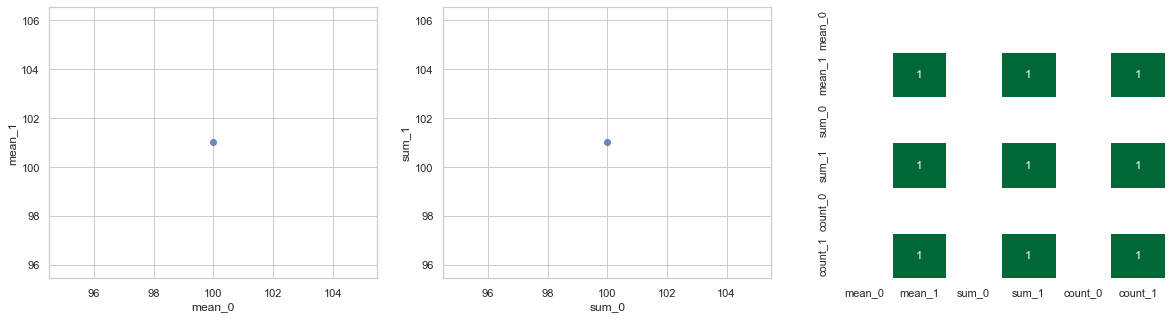

Год  2016


d:\Media\Repo\Miniconda\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
d:\Media\Repo\Miniconda\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


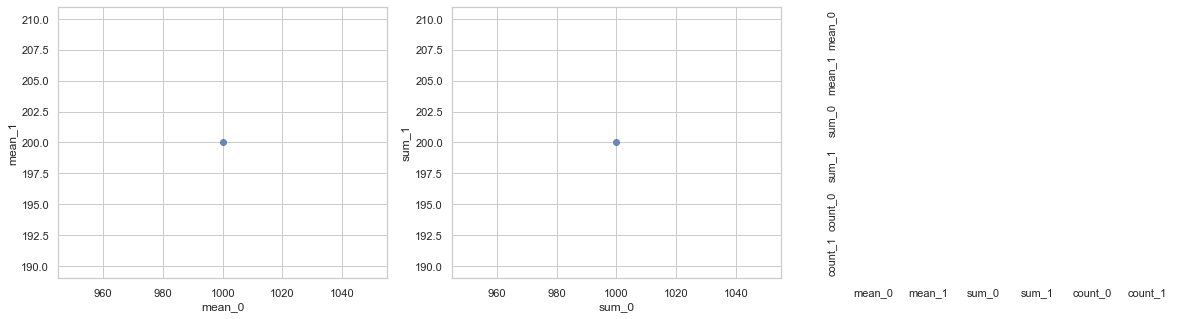

Год  2017


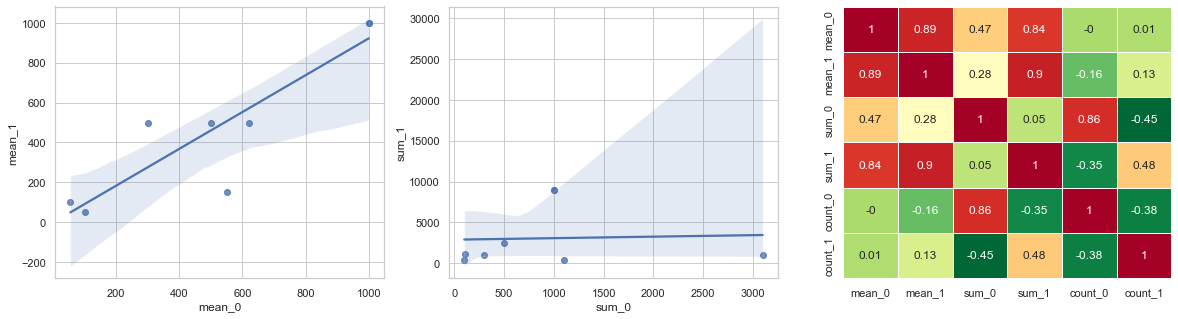

Год  2018


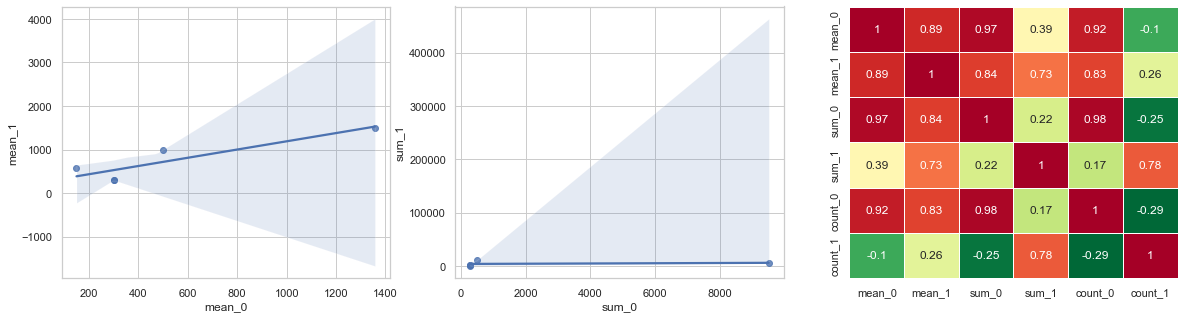

Год  2019


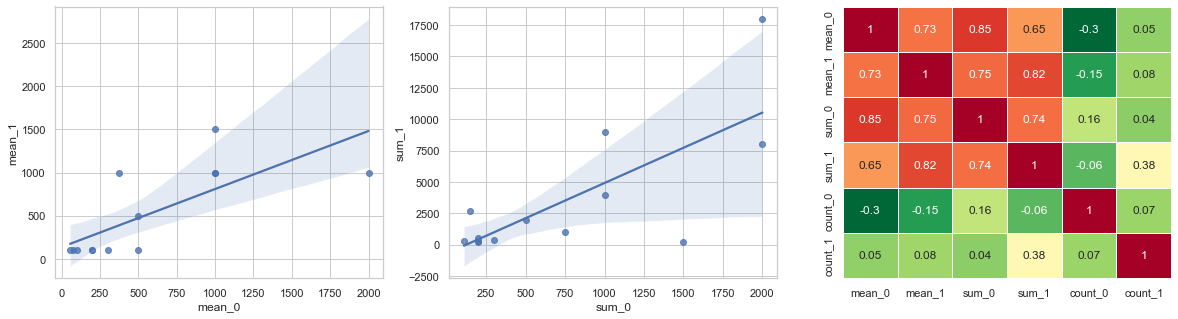

Год  2020


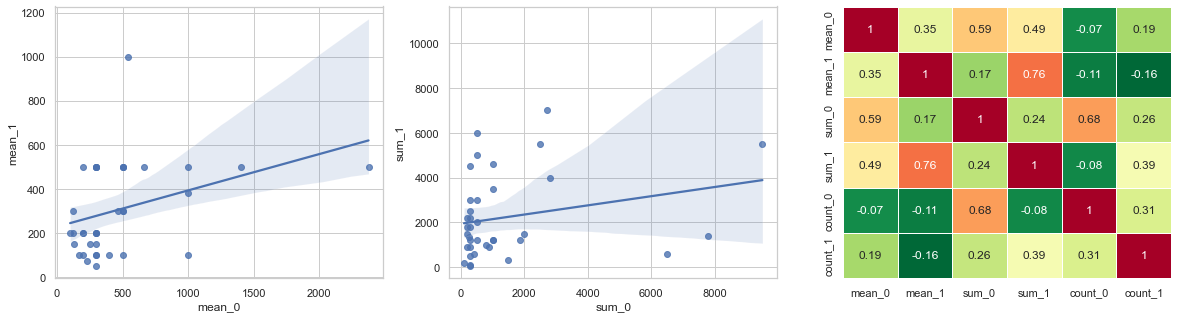

Год  2021


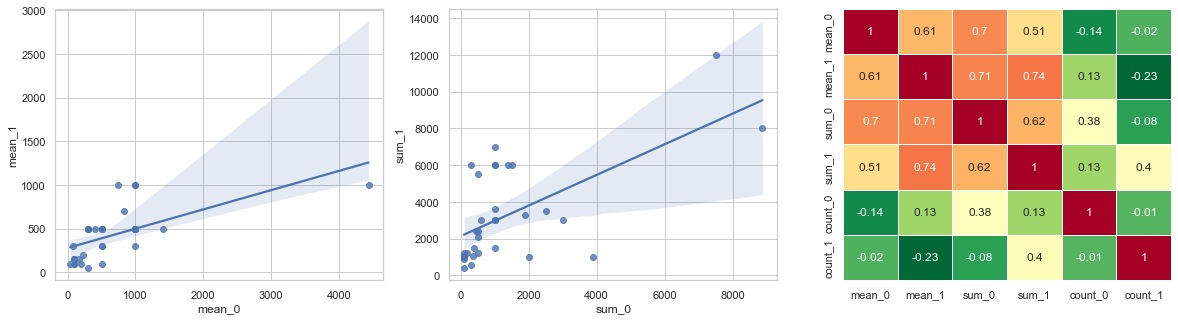

Год  2022


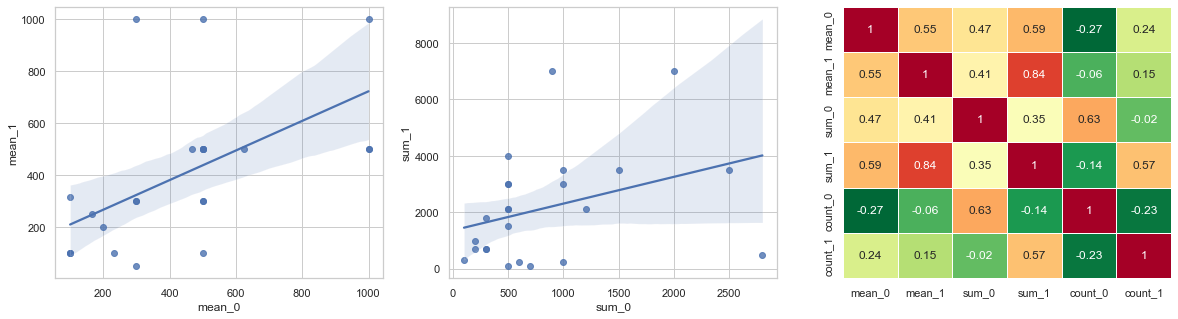

In [106]:
for item in donors_by_year.items():
    print('Год ', item[0])
    сut_recurrentis_0 = payments.query('year == @item[0] and recurrentis ==0').pay_sum.quantile(0.95)
    сut_recurrentis_1 = payments.query('year == @item[0] and recurrentis ==1').pay_sum.quantile(0.95)
    df_1 = payments.query('year == @item[0] and ID in @item[1] and pay_sum <@сut_recurrentis_1 and recurrentis ==1')
    df_0 = payments.query('year == @item[0] and ID in @item[1] and pay_sum <@сut_recurrentis_0 and recurrentis ==0')
    df = pd.concat([df_1, df_0], axis = 0)
    data = df.query('year == @item[0] and ID in @item[1]').pivot_table(index = 'ID', columns = 'recurrentis', values = 'pay_sum', aggfunc = ['mean', 'sum', 'count'])
    data.columns = ['mean_0', 'mean_1', 'sum_0', 'sum_1', 'count_0', 'count_1']
    plt.figure(figsize=(20,5))
    sns.regplot(x = data['mean_0'], y = data['mean_1'], ax = plt.subplot(1,3,1))
    sns.regplot(x = data['sum_0'], y = data['sum_1'], ax =plt.subplot(1,3,2))
    sns.heatmap(round(data.corr(), 2), ax = plt.subplot(1,3,3), annot = True, cbar=False, cmap='RdYlGn_r', linewidths=0.5)
    plt.show()
   

<div class="alert alert-info" style="background:#ffdbf1;color:#2e00ab">

**Вывод**

Мы будем ориентироваться на данные 2021 и 2022 годов. Для 2022 года у нас не так много записей по сравнения с 2021. С другой стороны посмотрим как изменилоась взаимосвзяь параметров под действием изменения внешнеполитической и экономической ситуаций

Итак по 2021 году:
- наблюдается умеренная положительная корреляция между средним разовым платежем и среднем платежем по подписке - коэф.корреляции = 0,61. Чем выше разовый платеж, тем выше подписка. При этом средняя подписка не превышает 1000 руб, а разовый платеж - 4500 тыс руб
- средние суммы всех платежей по подписке и средние суммы разовых платежей также имеют умеренную корреляцию (0,62) - средний донор приносит за все время подписки не более 12000 руб, по разовым платежам - не более 9000 руб

По 2022 году:
- коэффициент корреляции между средним разовым платежем и среднем платежем по подписке снизился до 0,55 по сравнению с 2021 годом, но все же можно сказать что наблюдается положительная умеренная корреляция. Средний разовый платеж не превышает 1000, как и подписка.
- между суммами наблюдается слабая корреляция (0,35). Мы не можем сравнивать суммы с 2021 годом, поскольку необходимы данные за весь 2022 год

Таким образом, гипотеза 3 не подтвердилась - как в 2021, так и в 2022 году существует положительная корреляция между оплатой по подписке и среднем разовым платежем. 
    

</div>

## Гипотеза 4 - частота единоразовых платежей от доноров,  осуществляющих платежи как по подписке, так и разово - невелика

In [107]:
for item in donors_by_year.items():
    print('Год', item[0])
    print('Среднее количество разовых платежей за год: ',round(payments .query('year == @item[0] and ID in @item[1] and recurrentis ==0').groupby('ID', as_index = False)['recurrentis'].count().recurrentis.mean(), 1))
    print('Среднее количество платежей по подписке за год: ',round(payments.query('year == @item[0] and ID in @item[1] and recurrentis ==1').groupby('ID', as_index = False)['recurrentis'].count().recurrentis.mean(), 1))
    print('_'*60)

Год 2015
Среднее количество разовых платежей за год:  1.0
Среднее количество платежей по подписке за год:  2.0
____________________________________________________________
Год 2016
Среднее количество разовых платежей за год:  1.0
Среднее количество платежей по подписке за год:  1.0
____________________________________________________________
Год 2017
Среднее количество разовых платежей за год:  1.8
Среднее количество платежей по подписке за год:  6.1
____________________________________________________________
Год 2018
Среднее количество разовых платежей за год:  2.0
Среднее количество платежей по подписке за год:  4.7
____________________________________________________________
Год 2019
Среднее количество разовых платежей за год:  2.0
Среднее количество платежей по подписке за год:  6.6
____________________________________________________________
Год 2020
Среднее количество разовых платежей за год:  3.2
Среднее количество платежей по подписке за год:  7.7
_____________________________

<div class="alert alert-info" style="background:#ffdbf1;color:#2e00ab">
    
**Вывод**
    
Мы подтвердили нашу гипотезу - действительно доноры совершаю до 3 разовых платежей в год, если у них имеется подписка
Помимо того стоит отметить что показатели по подписке, а точнее по ее длительности весьма неплохи - если у донора имеется подписка в текущем году, то скорее всего она будет действительна в среднем 7-9 месяцев из 12
</div>

## Гипотеза 5 - доноры сначала совершают единоразовые платежи, а затем переходят на подписку

In [108]:
donors_id = payments.groupby('ID')['recurrentis'].nunique().reset_index().query('recurrentis ==2')['ID']

In [109]:
first_pay = payments.query('ID in @donors_id').sort_values(by = ['ID', 'pay_datetime']).groupby('ID', as_index = False)['pay_datetime'].first()
round(first_pay.merge(payments[['ID', 'pay_datetime', 'recurrentis']], on = ['ID', 'pay_datetime'], how = 'left').recurrentis.value_counts(normalize = True)*100, 0) 

1    55.0
0    45.0
Name: recurrentis, dtype: float64

<div class="alert alert-info" style="background:#ffdbf1;color:#2e00ab">

**Вывод**
- нет общей тенденции в поведении пользователей - немного больше половины начинают с подписки, а затем добавляют разовые платежи.45% начинают с разовых платежей, а затем переходят на подписку
- гипотеза 5 не подтверждена
    
</div>

# Перспективные доноры только с рекурретными или только с разовыми платежами

## Перспективные доноры, осуществляющие только разовые платежи

Рассмотрим доноров, осуществляющих только разовые платежи, при этом количество таких платежей - не менее 6, последнее взаимодействие с продуктом - в 2022 году, и средний разовый платеж - не менее 2000 руб

In [158]:
perspective_0 = (payments.query('ID not in @donors_id and recurrentis ==0 and ID in @donors_paid_2022')
                 .groupby('ID', as_index = False)['pay_date'].count().query('pay_date >5')['ID'])

In [159]:
perspective_non_recurrent_donors = (round(payments.query('ID in @perspective_0')
                                          .sort_values(by = ['ID', 'pay_datetime'])
                                          .groupby('ID', as_index = False)
                                          .agg({'pay_sum':['mean', 'sum', 'count'], 'pay_datetime':['first', 'last']}), 0))

In [160]:
perspective_non_recurrent_donors.columns = ['ID', 'mean_pay', 'sum_pay', 'count_pay', 'date_first', 'date_last']

In [161]:
perspective_non_recurrent_donors.query('mean_pay >=2000')

,ID,mean_pay,sum_pay,count_pay,date_first,date_last
12,343CA5AF-CD0C-497A-B929-4027E59354CD,5000.0,135000.0,27,2020-05-18 00:00:00,2022-07-15 00:00:00
26,6BA628DC-D775-470C-A22D-B0EF55E62628,4542.0,236199.0,52,2020-11-11 23:00:37,2022-06-27 14:48:12
28,809919B8-4A98-4804-B789-CD632F2B4FE5,7925.0,158500.0,20,2017-03-04 17:35:29,2022-05-05 10:38:30
33,A296F473-BA77-4302-ADFB-B2CDFB85C382,3167.0,19000.0,6,2021-06-25 15:56:31,2022-02-08 12:10:18
46,CC65F6F5-A0B0-42F3-A81B-95289AB7E031,3500.0,35000.0,10,2020-12-02 15:53:57,2022-05-14 17:02:50
47,CFD213F1-4875-44B4-BCF3-C602DECCE30C,2600.0,26000.0,10,2021-07-13 00:00:00,2022-06-20 00:00:00
48,D52A7DF6-3241-458B-AC07-870A83032DC6,15000.0,90000.0,6,2021-06-01 15:49:45,2022-06-01 07:27:51
49,D72C9BBA-0EAC-473D-BE6B-DE91EAF9BAB6,9045.0,144725.0,16,2021-06-05 18:03:26,2022-07-28 09:39:02
54,ED1F3783-ABB0-4D45-AD3B-B477D2B53906,37988.0,227928.0,6,2020-11-05 00:00:00,2022-03-04 00:00:00


In [162]:
### тут ввёл переменную, чтобы повторно не считать
persp_non_rec_id = perspective_non_recurrent_donors.query('mean_pay >=2000')['ID'].to_list()
persp_non_rec_id

['343CA5AF-CD0C-497A-B929-4027E59354CD',
 '6BA628DC-D775-470C-A22D-B0EF55E62628',
 '809919B8-4A98-4804-B789-CD632F2B4FE5',
 'A296F473-BA77-4302-ADFB-B2CDFB85C382',
 'CC65F6F5-A0B0-42F3-A81B-95289AB7E031',
 'CFD213F1-4875-44B4-BCF3-C602DECCE30C',
 'D52A7DF6-3241-458B-AC07-870A83032DC6',
 'D72C9BBA-0EAC-473D-BE6B-DE91EAF9BAB6',
 'ED1F3783-ABB0-4D45-AD3B-B477D2B53906']

<div class="alert alert-info" style="background:#ffdbf1;color:#2e00ab">

**Вывод**

Для таких доноров - факт личного взаимодействия с продуктом очень важен с психологической точки - они могли бы оформить автоматическую подписку, но предпочитают переводить деньги вручную, получая моральное удовольствие от факта перевода. Скорее всего, такие доноры будут очень сильно заинтересованы в участие не только финансовом, но и социальном. При этом с финансовой точки зрения они также перспективны. Думаю, что если в рассылки будет подробно разъяснено, что подписка - лучше для фонда в плане стабильности, они перейдут на подписку, а их вовлеченность в социальную деятельность фонда удовлетворит их потребности в реализации добрых дел
    
</div>

## Доноры, имеющие только подписки

Рассмотрим доноров с подпиской более 1000 руб, количеством платежей по подписке - более 5, осуществивших последний платеж по подписке не позднее 2022 года

In [179]:
perspective_1 = (payments.query('ID not in @donors_id and recurrentis ==1 and ID in @donors_paid_2022')
                 .groupby('ID', as_index = False)['pay_date'].count().query('pay_date >7')['ID'])

In [180]:
perspective_recurrent_donors = (round(payments.query('ID in @perspective_1')
                                      .sort_values(by = ['ID', 'pay_datetime'])
                                      .groupby('ID', as_index = False)
                                      .agg({'pay_sum':['mean', 'sum', 'count'], 'pay_datetime':['first', 'last']}), 0))

In [181]:
perspective_recurrent_donors.columns = ['ID', 'mean_pay', 'sum_pay', 'count_pay', 'date_first', 'date_last']

In [182]:
perspective_recurrent_donors.query('mean_pay >1000')

,ID,mean_pay,sum_pay,count_pay,date_first,date_last
1,05B8107B-349D-440B-92B0-EF081B5065A3,2456.0,83500.0,34,2018-12-28 09:53:43,2022-07-12 19:36:36
40,67BED449-3429-4190-AA55-DF8267B7A196,2500.0,110000.0,44,2018-12-01 14:41:09,2022-07-01 14:41:51
41,6A272E17-E3D5-4C07-B908-799D7F5769CE,5000.0,45000.0,9,2021-10-15 14:34:50,2022-07-26 13:25:50
46,72B86851-7292-4C03-88D9-4B55E5F648B9,3000.0,81000.0,27,2019-12-12 14:53:24,2022-02-12 14:54:37
65,9B35673B-5CD8-48BC-A419-1E574FECBA53,5000.0,140000.0,28,2020-03-29 10:17:31,2022-06-29 10:18:02
67,9C018A15-7CF6-4BDE-8741-6755A920351C,2500.0,90000.0,36,2019-04-27 17:29:24,2022-06-27 17:29:39
92,DA568BE7-7B70-4C80-96C1-AA7173D2613A,1735.0,59000.0,34,2019-10-22 12:32:23,2022-07-27 00:28:47
99,E674F8AF-2ECD-4253-9AC5-761F2D641205,2500.0,105000.0,42,2019-01-20 19:57:26,2022-07-18 14:53:36
106,F078657B-7643-4F20-9B77-4DB7AD4A9920,2000.0,56000.0,28,2020-04-17 22:06:11,2022-07-17 22:18:07


In [185]:
### добавил перменную
perspective_recurrent_donors_id = perspective_recurrent_donors.query('mean_pay >1000')['ID'].to_list()
perspective_recurrent_donors_id

['05B8107B-349D-440B-92B0-EF081B5065A3',
 '67BED449-3429-4190-AA55-DF8267B7A196',
 '6A272E17-E3D5-4C07-B908-799D7F5769CE',
 '72B86851-7292-4C03-88D9-4B55E5F648B9',
 '9B35673B-5CD8-48BC-A419-1E574FECBA53',
 '9C018A15-7CF6-4BDE-8741-6755A920351C',
 'DA568BE7-7B70-4C80-96C1-AA7173D2613A',
 'E674F8AF-2ECD-4253-9AC5-761F2D641205',
 'F078657B-7643-4F20-9B77-4DB7AD4A9920']

<div class="alert alert-info" style="background:#ffdbf1;color:#2e00ab">
    
**Вывод**

Скорее всего такие доноры не ищут большой вовлеченности в продукт - один раз услышав о продукте, они оформляют подписку и не осуществляют разовых платежей, считая, что подписки вполне достаточно. Скорее всего есть определенное вероятность вовлечь их в разовые платежи 
    
</div>

# Вывод

<div class="alert alert-info" style="background:#ffdbf1;color:#2e00ab">
    
- **Гипотеза 1** - среди доноров подавляющее большинство осуществляют платежи или только по подписке, или только разово Филантропы, совершающие платежи и по подписке и разово - редкость - **ПОДТВЕРДИЛАСЬ** - количество доноров и с подпиской и с разовыми платежами невелико - не выше 4,5%
    
    
- **Гипотеза 2** - аномально высокие значения платежей (как по подписки, так и разовых) для рассматриваемых доноров позволяют найти переспективных и более вовлеченных в продукт филантропов - **мы нашли ID потенциально перспективных клиентов**, с которыми можно работать с помощью рассылки для их большего вовлечения в продукт 
       ['2AA1C086-BF4C-4A5B-9237-FCB7BAB3B038',
       '99A56103-5BDB-4C2B-AF08-0EF1A3D4DC37',
       '2757CAE1-79DF-4D22-8B80-2886279B39AB',
       '6267B856-FE6F-4C2A-A6E4-2713B95A6193',
       'BD5E1551-C7FD-4AB4-904D-EEA917645E3F',
       'CDEF2137-D5F3-434E-BC9F-E219EF43F8C5',
       'AFDD49D8-0156-4B72-8B9E-AE332C41816C',
       'D185B410-AA9A-4870-B39E-9F3F38FF6CB1',
       '1FB01C18-2033-428D-B534-EB01626C08B3',
       '7359E58F-BB53-4354-85DE-EFF6175EDE5B']
    
- **Гипотеза 3** - среди доноров, осуществляющих платежи как по подписке, так и разово, суммы рекурентных и нерукерентных платежей взаимосвязаны - чем больше рекуретный платеж, тем меньше разовый - **ОПРОВЕРГЛИ** - наблюдается положительная умеренна корреляция между рекуретными и нерекуретными платежами (кожффициент корреляции 2021 год 0,65; 2022 год - 0,55)
    
    
- **Гипотеза 4** - частота единоразовых платежей от доноров, осуществляющих платежи как по подписке, так и разово - невелика - **ПОДТВЕРДИЛИ** - частота таких платежей - до 3 раз в год
    
    
- **Гипотеза 5** - доноры сначала совершают единоразовые платежи, а затем переходят на подписку - **ОПРОВЕРГЛИ** - нет общей тенденции, доноры поделены практически поровну - 45% начинает свое взаиможействие с платформой с разовых платежей, 55% - c подписки
    
    
- мы выявили ID потенциально перспективных пользователей только с разовыми платежами 
    
    ['343CA5AF-CD0C-497A-B929-4027E59354CD',
 '6BA628DC-D775-470C-A22D-B0EF55E62628',
 '809919B8-4A98-4804-B789-CD632F2B4FE5',
 'A296F473-BA77-4302-ADFB-B2CDFB85C382',
 'CC65F6F5-A0B0-42F3-A81B-95289AB7E031',
 'CFD213F1-4875-44B4-BCF3-C602DECCE30C',
 'D52A7DF6-3241-458B-AC07-870A83032DC6',
 'D72C9BBA-0EAC-473D-BE6B-DE91EAF9BAB6',
 'ED1F3783-ABB0-4D45-AD3B-B477D2B53906']
    
    и с подпиской
    
    ['05B8107B-349D-440B-92B0-EF081B5065A3',
 '67BED449-3429-4190-AA55-DF8267B7A196',
 '6A272E17-E3D5-4C07-B908-799D7F5769CE',
 '72B86851-7292-4C03-88D9-4B55E5F648B9',
 '9B35673B-5CD8-48BC-A419-1E574FECBA53',
 '9C018A15-7CF6-4BDE-8741-6755A920351C',
 'DA568BE7-7B70-4C80-96C1-AA7173D2613A',
 'E674F8AF-2ECD-4253-9AC5-761F2D641205',
 'F078657B-7643-4F20-9B77-4DB7AD4A9920']

    
**Дополнительные предложения:**
- внести в таблицу сведения является ли клиент юридическим или физическим лицом
- пересмотреть оценку lifetime доноров - определить эмпирически период бездействия пользователя, по истечению которого мы считаем пользователя ушедшим из продукта. При его последующем возвращении считать за нового пользователя и начинать отчет lifetime с начала
</div>